# IMPORTS

## Libraries

In [1]:
import pylab

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn.tree    import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, average_precision_score


%matplotlib inline
pd.set_option('display.max_columns', 200)

# Load Data

In [2]:
dfTrain = pd.read_feather('../Data/FeatherData/dfTrainGS.feather')
dfTest = pd.read_feather('../Data/FeatherData/dfTestGS.feather')

In [3]:
dfTrain = dfTrain.sort_values('UploadDate')

# Generating some features to evaluate a simple model

In [4]:
dfFeatures = pd.DataFrame(index=dfTrain.index)

In [49]:
dfFeatures['ViewCount'] = dfTrain['ViewCount']
dfFeatures['DaysSincePublication'] = dfTrain['DaysSincePublication']
dfFeatures['WatchList'] = dfTrain['WatchList'].astype(int)
dfFeatures['ViewsPerDay'] = dfFeatures['ViewCount'] / dfFeatures['DaysSincePublication']
dfFeatures = dfFeatures.drop('DaysSincePublication', axis=1)

In [50]:
dfFeatures.head()

,ViewCount,WatchList,ViewsPerDay
455,3,1,0.001343
98,1,0,0.000451
372,303,1,0.137602
274,53,1,0.024190
402,9,0,0.004202


# Split DataFrame into Training and Validation Dataset

<AxesSubplot:>

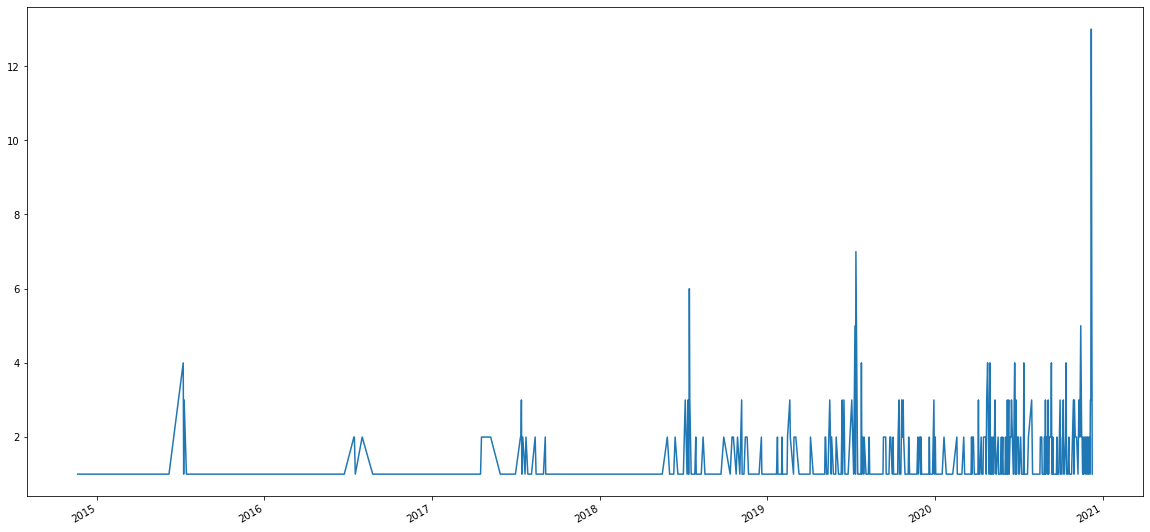

In [51]:
dfTrain['UploadDate'].value_counts().plot(figsize=(20, 10))

In [52]:
Xtrain, Xval = dfFeatures.iloc[:int(round(dfTrain.shape[0]/2,0))].drop('WatchList', axis=1), dfFeatures.iloc[int(round(dfTrain.shape[0]/2,0)):].drop('WatchList', axis=1)
ytrain, yval = dfFeatures['WatchList'].iloc[:int(round(dfTrain.shape[0]/2,0))], dfFeatures['WatchList'].iloc[int(round(dfTrain.shape[0]/2,0)):]

In [53]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((400, 2), (400, 2), (400,), (400,))

# Model

## DecisionTreeClassifier

In [69]:
model = DecisionTreeClassifier(random_state=0, max_depth=2, class_weight='balanced')
model.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=0)

In [70]:
p = model.predict_proba(Xval)[:,1]

## Model Evaluate 

In [71]:
average_precision_score(yval,p)

0.19842797983955404

In [72]:
roc_auc_score(yval, p)

0.5868853928555422

## Tree Plot

[Text(446.4, 724.8, 'ViewsPerDay <= 0.557\ngini = 0.5\nsamples = 400\nvalue = [200.0, 200.0]'),
 Text(223.2, 434.88, 'ViewCount <= 76.5\ngini = 0.5\nsamples = 373\nvalue = [184.127, 195.294]'),
 Text(111.6, 144.95999999999992, 'gini = 0.499\nsamples = 305\nvalue = [155.556, 141.176]'),
 Text(334.79999999999995, 144.95999999999992, 'gini = 0.452\nsamples = 68\nvalue = [28.571, 54.118]'),
 Text(669.5999999999999, 434.88, 'ViewCount <= 686.5\ngini = 0.353\nsamples = 27\nvalue = [15.873, 4.706]'),
 Text(558.0, 144.95999999999992, 'gini = 0.0\nsamples = 17\nvalue = [10.794, 0.0]'),
 Text(781.1999999999999, 144.95999999999992, 'gini = 0.499\nsamples = 10\nvalue = [5.079, 4.706]')]

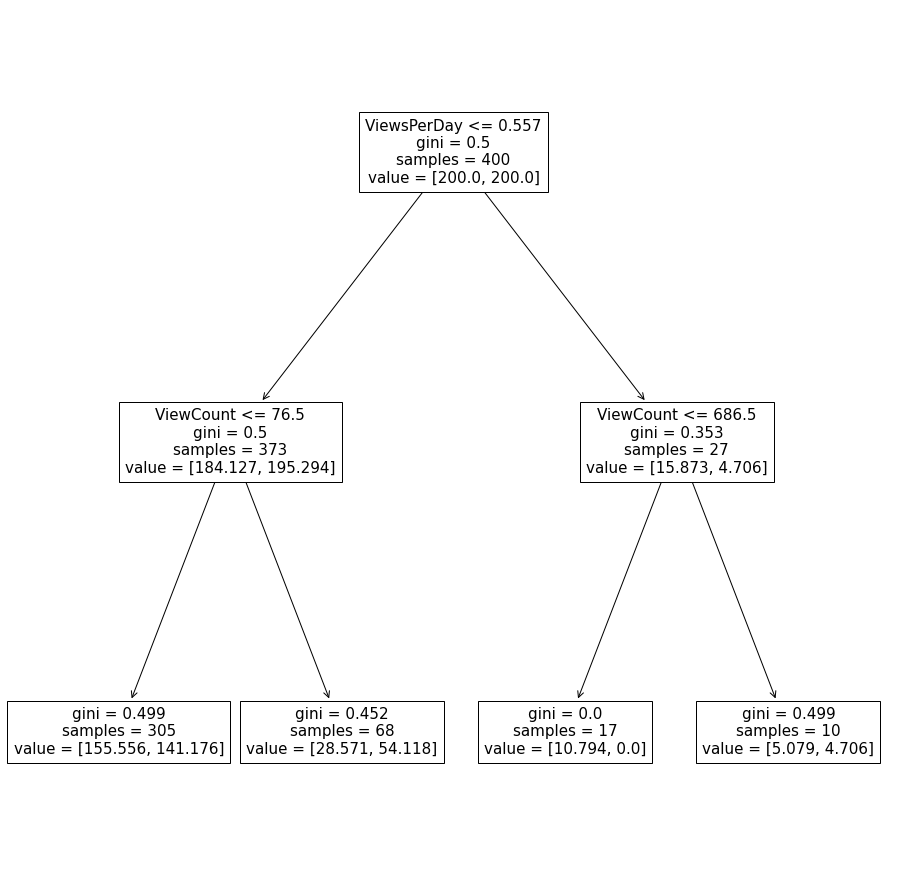

In [73]:
fig, ax = pylab.subplots(1, 1, figsize=(16,16))
plot_tree(model, ax=ax, feature_names=Xtrain.columns)